In [ ]:
5kimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.regularizers import l1, l2
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adobe5k.csv')

##### *`500 non-null`* inka matla as 500 hi rows thi to usme koi bhi null ya khali collum nhi h. so proper data

In [ ]:
y = df['Edited Hue']
X = df[["Raw Hue"]]
X = X[0:4000]
y = y[0:4000]


In [ ]:
y = df['Edited Saturation']
X = df[["Raw Saturation"]]
X = X[0:4000]
y = y[0:4000]

In [ ]:
y = df['Edited Exposure']
X = df[["Raw Exposure"]]
X = X[0:4000]
y = y[0:4000]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model architecture
def create_model(hidden_layers, activation, optimizer, l1_reg, l2_reg):
    model = Sequential()
    for i, nodes in enumerate(hidden_layers):
        if i == 0:
            model.add(Dense(nodes, activation=activation, input_shape=(X.shape[1],),kernel_regularizer=l2(l2=l2_reg),bias_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
            model.add(Dropout(0.1))
        else:
            model.add(Dense(nodes, activation=activation,kernel_regularizer=l2( l2=l2_reg),bias_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
            model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=["accuracy"])
    return model

# Hyperparameter tuning
param_grid = {
    'hidden_layers': [(256 , 256,128,64)],
    'activation': ['elu'],
    'batch_size': [50],
    'epochs': [2000],
    'optimizer': ['adam'],
    'l2_reg': [0.0001]
}

# Create the model
model = create_model(hidden_layers=(10,), activation='elu', optimizer='adam',
                     l1_reg=0.0001, l2_reg=0.0001)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, val_index in kfold.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32,
              callbacks=[early_stopping], verbose=1)

    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

print(f"Mean Squared Error (Cross-validation): {np.mean(mse_scores):.4f} (+/- {np.std(mse_scores):.4f})")
print(f"R-squared (Cross-validation): {np.mean(r2_scores):.4f} (+/- {np.std(r2_scores):.4f})")

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 0.2597 - accuracy: 0.0000e+00 - val_loss: 0.0876 - val_accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 

In [ ]:
best_model = model
best_model.save('/content/drive/MyDrive/Colab Notebooks/ExposureModel.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
y_test = df['Edited Hue']
X_test = df[["Raw Hue"]]
X_test = X_test[4000:]
y_test = y_test[4000:]


In [ ]:
y_test = df['Edited Saturation']
X_test = df[["Raw Saturation"]]
X_test = X_test[4000:]
y_test = y_test[4000:]


In [ ]:
y_test = df['Edited Exposure']
X_test = df[["Raw Exposure"]]
X_test = X_test[4000:]
y_test = y_test[4000:]


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/ExposureModel.h5')
y_pred = loaded_model.predict(X_test)
y_pred
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.to_csv('/content/drive/MyDrive/Colab Notebooks/resultExposure.csv',index=False)

32/32 [==============================] - 0s 1ms/step


In [ ]:
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the data points
# ax.scatter(X['Raw Hue'], X['Raw Exposure'], X['Raw Saturation'], c=y, cmap='viridis')

# # Set labels for the axes
# ax.set_xlabel('Input 1')
# ax.set_ylabel('Input 2')
# ax.set_zlabel('Input 3')

# # Set a color bar to represent the output values
# cbar = plt.colorbar(ax.scatter(X['Raw Hue'], X['Raw Exposure'], X['Raw Saturation'], c=y, cmap='viridis'))
# cbar.set_label('Output')

# # Set a title for the plot
# plt.title('3D Scatter Plot with Three Inputs and One Output')

# # Display the plot
# plt.tight_layout()
# plt.show()

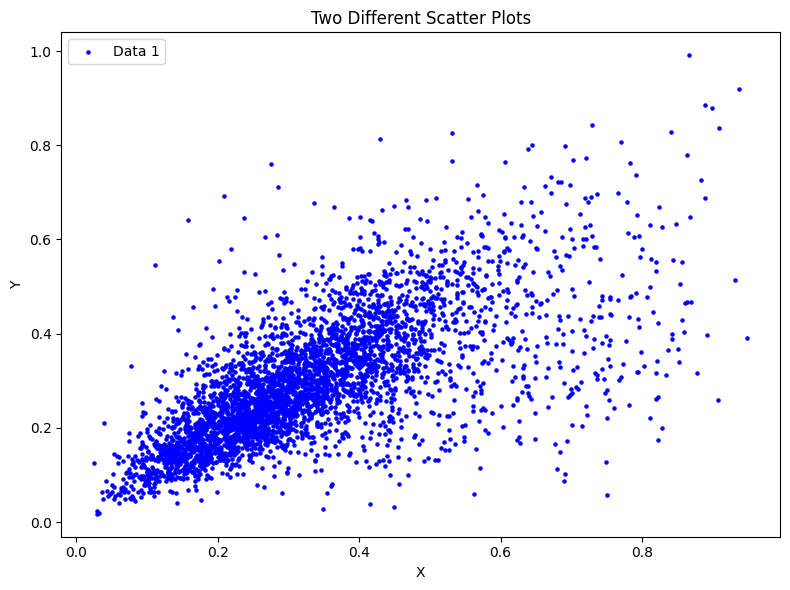

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the first scatter plot
ax.scatter(X_train, y_train, s=5, color='blue', marker='o', label='Data 1')

# Plot the second scatter plot
# ax.scatter(X_test, y_test, s=1, color='red', marker='s', label='Data 2')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two Different Scatter Plots')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train_scale = scaler.fit_transform(X_train)
# X_test_scale = scaler.transform(X_test)
# X_train_scale[0]

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:

model = Sequential()
model.add(Dense(128 , activation='linear',input_dim=1))
model.add(Dropout(0.5))

model.add(Dense(128, activation="linear",))
model.add(Dropout(0.5))

model.add(Dense(128, activation="linear",))
model.add(Dropout(0.5))

model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                64        
                                                                 
 dense_13 (Dense)            (None, 20)                660       
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1165 (4.55 KB)
Trainable params: 1165 (4.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
# model.compile(loss="mean_absolute_error", optimizer="Adam", metrics=["accuracy"])
model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history =model.fit(X_train_scale,y_train,epochs=1200,validation_split=0.2,callbacks=callback,batch_size=90)

Epoch 1/1200
36/36 [==============================] - 1s 9ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 2/1200
36/36 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 3/1200
36/36 [==============================] - 0s 5ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 4/1200
36/36 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 5/1200
36/36 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 6/1200
36/36 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 7/1200
36/36 [==============================] - 0s 5ms/step - loss: 0.0079 - accuracy: 0.0000e

In [ ]:
history.history

{'loss': [0.06005251035094261,
  0.060706883668899536,
  0.059306178241968155,
  0.059954509139060974,
  0.05946139991283417,
  0.05930627882480621,
  0.05958510935306549,
  0.05868828669190407,
  0.059308189898729324,
  0.058548182249069214,
  0.05816556140780449,
  0.05892582982778549,
  0.05871281772851944,
  0.05851894989609718,
  0.05851171538233757,
  0.058685302734375,
  0.059581149369478226,
  0.058781519532203674,
  0.058929670602083206,
  0.05901515483856201,
  0.05841333046555519,
  0.05847897380590439,
  0.05905008688569069,
  0.05884699895977974,
  0.05905221030116081,
  0.05974770709872246,
  0.058357205241918564,
  0.058981381356716156,
  0.05824755132198334,
  0.058982208371162415,
  0.058488551527261734,
  0.058777064085006714],
 'accuracy': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_l

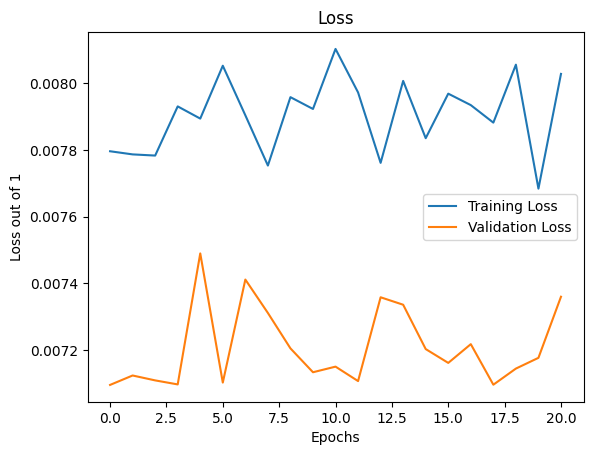

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss out of 1")
plt.legend()  # Adding legend

In [ ]:
y_pred = model.predict(X_test_scale)

32/32 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true=Y_test,y_pred=y_pred)

0.5937650939704793

In [ ]:
y_pred[0]


In [ ]:
y_pred[1]

In [ ]:
y_pred

array([[0.3934773 ],
       [0.4283785 ],
       [0.40596753],
       [0.41127735],
       [0.31786582],
       [0.2356781 ],
       [0.2396209 ],
       [0.22715777],
       [0.49563003],
       [0.22851014],
       [0.23849419],
       [0.3645452 ],
       [0.47573325],
       [0.44734517],
       [0.33435634],
       [0.29413006],
       [0.3592463 ],
       [0.41598552],
       [0.5478349 ],
       [0.2669004 ],
       [0.34160414],
       [0.23755243],
       [0.23567894],
       [0.25881535],
       [0.2259183 ],
       [0.3643631 ],
       [0.33494407],
       [0.2374827 ],
       [0.5321602 ],
       [0.35509697],
       [0.35901573],
       [0.39513835],
       [0.22447592],
       [0.2581616 ],
       [0.35679662],
       [0.5369314 ],
       [0.23557341],
       [0.48680893],
       [0.37902322],
       [0.22952837],
       [0.22765946],
       [0.5279115 ],
       [0.22734207],
       [0.5491361 ],
       [0.22398818],
       [0.31272793],
       [0.29578835],
       [0.246